# Projet 3 : Concevez une application au service de la santé publique #

### Import du nécessaire ###

In [1]:
# import numpy as np
import annexe as an
# import re
import pandas as pd
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)
FICHIER ='C:/Users/pierr/Documents/OC/projet3/en.openfoodfacts.org.products.csv'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

## Observations


Observons quelques lignes de notre fichier

In [2]:
food_dataframe = pd.read_csv(FICHIER,sep='\t',low_memory=False)

In [3]:
print("fichier de",food_dataframe.shape[0],"produits alimentaire et",food_dataframe.shape[1],"variables")

fichier de 1793993 produits alimentaire et 186 variables


In [4]:
display(food_dataframe.sample(10,random_state = 148625))

code                                                                                                             url          creator   created_t      created_datetime  last_modified_t last_modified_datetime                           product_name abbreviated_product_name generic_name quantity packaging packaging_tags packaging_text                    brands              brands_tags  \
1487069  8011510004527                             http://world-en.openfoodfacts.org/product/8011510004527/bianco-d-italia-sancrispino          kiliweb  1616587526  2021-03-24T12:05:26Z       1616587527   2021-03-24T12:05:27Z            Bianco d'italia Sancrispino                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
1266529  5410471910466  http://world-en.openfoodfacts.org/product/5410471910466/destrooper-biscuits-a-l-orange-14x67g-jules-destrooper          kiliweb  1537540389  2018-09-21T14:33:09Z       1582661071   2020-02-25T20:04:31Z  Destrooper Biscuits à L'orange 14X67G                      NaN          NaN      NaN       NaN            NaN            NaN          Jules Destrooper         jules-destrooper   
1149142  4311596692460                                    http://world-en.openfoodfacts.org/product/4311596692460/haferdrink-ungesusst          kiliweb  1621270652  2021-05-17T16:57:32Z       1621270657   2021-05-17T16:57:37Z                    Haferdrink ungesüßt                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
1434573  8000633025380                                                    http://world-en.openfoodfacts.org/product/8000633025380/ceci          kiliweb  1580672875  2020-02-02T19:47:55Z       1604059117   2020-10-30T11:58:37Z                                   Ceci                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
265419   0099482471477                               http://world-en.openfoodfacts.org/product/0099482471477/white-corn-tortilla-chips          kiliweb  1566607651  2019-08-24T00:47:31Z       1567015119   2019-08-28T17:58:39Z             White Corn, Tortilla Chips                      NaN          NaN      NaN       NaN            NaN            NaN                       NaN                      NaN   
17756    0011822661508                  http://world-en.openfoodfacts.org/product/0011822661508/unsalted-roasted-whole-cashews-big-win  usda-ndb-import  1489071293  2017-03-09T14:54:53Z       1587584747   2020-04-22T19:45:47Z         Unsalted Roasted Whole Cashews                      NaN          NaN      NaN       NaN            NaN            NaN                   Big Win                  big-win   
1546319  8410095007433                               http://world-en.openfoodfacts.org/product/8410095007433/borraja-al-natural-helios          kiliweb  1573764051  2019-11-14T20:40:51Z       1573770688   2019-11-14T22:31:28Z                     Borraja al natural                      NaN          NaN    400 g       NaN            NaN            NaN                    Helios                   helios   
48397    0024182002997                        http://world-en.openfoodfacts.org/product/0024182002997/eden-organic-refried-black-beans          kiliweb  1574269010  2019-11-20T16:56:50Z       1582826223   2020-02-27T17:57:03Z       Eden organic refried black beans                      NaN          NaN    16 oz       NaN            NaN            NaN                      Eden                     eden   
408743   0806253210407                                   http://world-en.openfoodfacts.org/product/0806253210407/organic-coconut-cream          kiliweb  1583117784  2020-03-02T02:56:24Z       1583117785   2020-03-02T02:56:25Z                  Organic coconut cream                      NaN          NaN      NaN       NaN            NaN            NaN             

Observons la liste de colonnes

In [5]:
for column in food_dataframe.columns:
    print(column)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
ecoscore_score_fr
ecoscore_grade_fr


## Nettoyage des données

Dataframe après avoir gardé que les variables pertinantes et enlevé les duplicats.

In [6]:
dataframe_purify = an.open_csv_usefull_column()

Ouverture initiale, fichier avec 186 produits et 1793993 variables
Nettoyage initial, fichier avec 150 produits et 1793991 variables


In [17]:
copy_dataframe_purify = dataframe_purify.copy()

Nombre de valeurs définies renseignées pour chaque variable

In [8]:
copy_dataframe_purify.count()

code                                       1793991
url                                        1793991
product_name                               1716171
abbreviated_product_name                      5146
quantity                                    460906
packaging                                   286975
packaging_tags                              286945
packaging_text                                4299
brands                                      930021
brands_tags                                 929964
categories                                  857970
categories_tags                             857968
categories_en                               857968
emb_codes                                   114242
emb_codes_tags                              114211
first_packaging_code_geo                     70273
purchase_places                             152174
countries                                  1788437
countries_tags                             1788432
countries_en                   

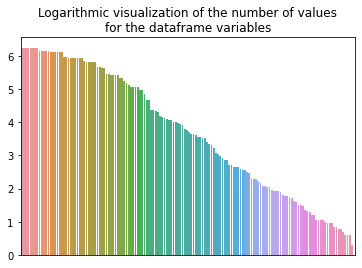

In [9]:
an.barplot_logarithm(copy_dataframe_purify.count(),"Logarithmic visualization of the number of values\nfor the dataframe variables")

Il y a beaucoup de variables avec peu de valeurs, je ne trouve pas de seuil véritable. Je vais enlever les variables avec moins de 20 valeurs, elles risqueraient de biaiser les résultats d'une future application.

In [18]:
print("Dataframe de",copy_dataframe_purify.shape[1],"colonnes en entrée")
copy_dataframe_purify2 = copy_dataframe_purify.drop(copy_dataframe_purify.loc[:,copy_dataframe_purify.count() <= 20].columns,axis="columns")
print("Dataframe de",copy_dataframe_purify2.shape[1],"colonnes en sortie")
print(copy_dataframe_purify.shape[1]-copy_dataframe_purify2.shape[1],"colonnes ont été enlevées")

Dataframe de 150 colonnes en entrée
Dataframe de 129 colonnes en sortie
21 colonnes ont été enlevées


#### maximums

Affichage des maximums de chaque variable du dataframe.

In [11]:
copy_dataframe_purify2.max()

code                                                                                                   999999999999999
url                                        http://world-en.openfoodfacts.org/product/999999999999999/signal-toothpaste
nutriscore_score                                                                                                  40.0
ecoscore_score_fr                                                                                                125.0
energy-kj_100g                                                           6665558888888888950360610417759390841962496.0
energy-kcal_100g                                                                                       8693855001005.0
energy_100g                                                              6665558888888888950360610417759390841962496.0
energy-from-fat_100g                                                                                            3830.0
fat_100g                                        

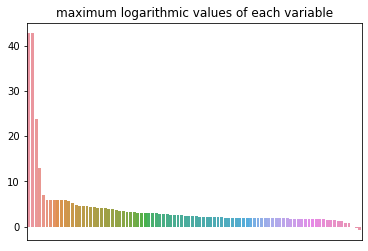

In [12]:
an.barplot_logarithm(copy_dataframe_purify2.drop(["code","url"],axis="columns").max(),"maximum logarithmic values of each variable")

#### minimums

Affichage des minimums de chaque variable du dataframe.

In [15]:
copy_dataframe_purify2.min()

code                                                                                                  0000000000017
url                                        http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers
nutriscore_score                                                                                              -15.0
ecoscore_score_fr                                                                                             -23.0
energy-kj_100g                                                                                                  0.0
energy-kcal_100g                                                                                                0.0
energy_100g                                                                                                     0.0
energy-from-fat_100g                                                                                            0.0
fat_100g                                                                

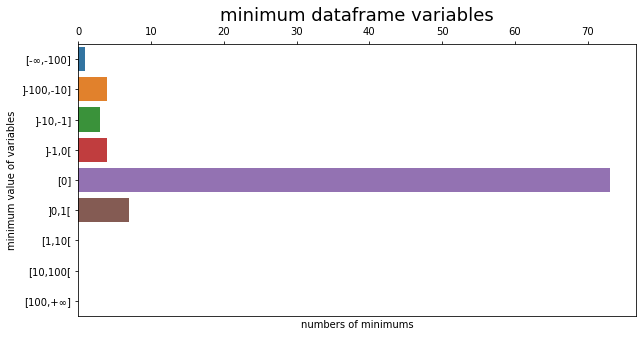

In [16]:
dataframe_without_parasite = copy_dataframe_purify2.drop(["code","url"],axis="columns")
an.barplot_number_of_values(dataframe_without_parasite)

Il y a énormement de valeurs abhérentes dans les maximums et les minimums de chaque colonne comme par exemple 44400g de magnésium pour 100g de produit ou le -500g de protéines pour 100g de produit. Il faut donc nettoyer un peu le dataframe en enlevant les quantiles extrêmes des colonnes contenant de l'information numérique utile.

Je vais enlever les quantiles extrêmes de chaque colonne. Il faut faire attention à ne pas traiter toutes les colonnes de la même manière, les kcal pour 100g peuvent dépasser une valeur de 100, les ecoscores peuvent être négatifs, le sodium pour 100g peut s'approcher de 100g. Je vais appliquer un traitement en fonction de la variable que je traite afin de ne pas éliminer trop de produits par variable.

In [21]:
dataframe_second_purification = an.remove_little_quantile(copy_dataframe_purify2)

forme du dataframe d'entré : 1793991  lignes et  129  colonnes.
column : nutrition-score-fr_100g ,  21  values erased
column : energy_100g ,  3518  values erased
column : energy-kj_100g ,  5  values erased
column : energy-kcal_100g ,  149  values erased
column : energy-from-fat_100g ,  5  values erased
column : carbon-footprint_100g ,  5  values erased
column : carbon-footprint-from-meat-or-fish_100g ,  30  values erased
column : -butyric-acid_100g ,  0  values erased
column : -palmitic-acid_100g ,  1  values erased
column : -arachidic-acid_100g ,  1  values erased
column : -behenic-acid_100g ,  1  values erased
column : omega-3-fat_100g ,  8  values erased
column : -alpha-linolenic-acid_100g ,  8  values erased
column : -eicosapentaenoic-acid_100g ,  2  values erased
column : -docosahexaenoic-acid_100g ,  3  values erased
column : omega-6-fat_100g ,  6  values erased
column : -linoleic-acid_100g ,  5  values erased
column : -arachidonic-acid_100g ,  2  values erased
column : omega-9-f

Visualisation de si l'algorythme à bien enlevé les valeurs abhérentes des minimums et des maximums.

In [22]:
print("Nouveaux maximums pour le dataframe\n")
display(dataframe_second_purification.max())
print("\nNouveaux minimums pour le dataframe\n")
display(dataframe_second_purification.min())

Nouveaux maximums pour le dataframe



code                                                                                                   999999999999999
url                                        http://world-en.openfoodfacts.org/product/999999999999999/signal-toothpaste
nutriscore_score                                                                                                  36.0
ecoscore_score_fr                                                                                                125.0
energy-kj_100g                                                                                                  3827.0
energy-kcal_100g                                                                                                1041.0
energy_100g                                                                                                     4351.0
energy-from-fat_100g                                                                                            3350.0
fat_100g                                        


Nouveaux minimums pour le dataframe



code                                                                                                  0000000000017
url                                        http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers
nutriscore_score                                                                                              -15.0
ecoscore_score_fr                                                                                             -23.0
energy-kj_100g                                                                                                  0.0
energy-kcal_100g                                                                                                0.0
energy_100g                                                                                                     0.0
energy-from-fat_100g                                                                                            0.0
fat_100g                                                                

Voici deux exemples des valeurs avant traitement du dataframe, pour l'energie en kj pour 100g et la taurine pour 100g.

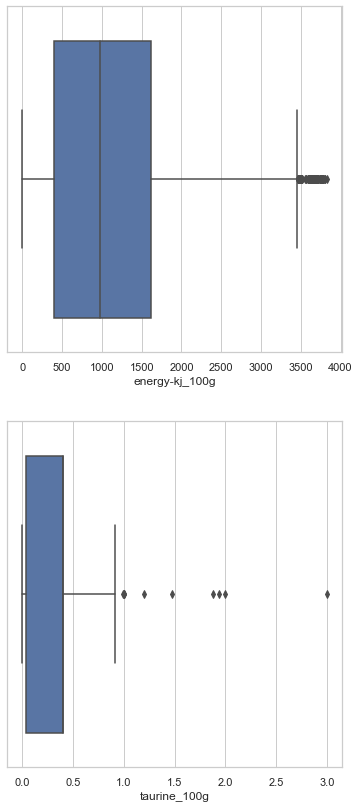

In [24]:
sns.set_theme(style="whitegrid")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,14))
f1 = sns.boxplot(x=dataframe_second_purification["energy-kj_100g"],ax=ax1)
f2 = sns.boxplot(x=dataframe_second_purification["taurine_100g"],ax=ax2)

Les mêmes variables après traitement.

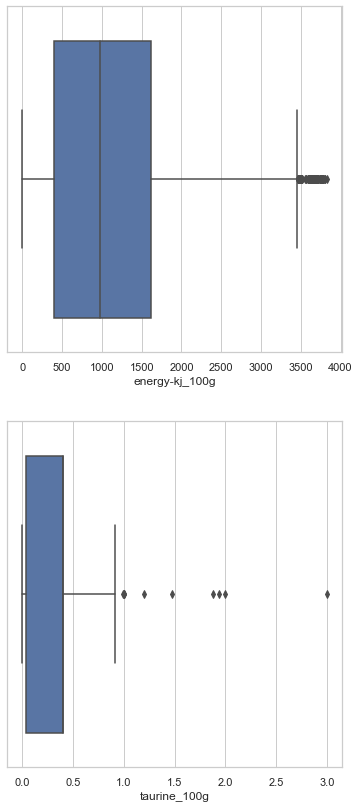

In [25]:
sns.set_theme(style="whitegrid")
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,14))
f1 = sns.boxplot(x=dataframe_second_purification["energy-kj_100g"],ax=ax1)
f2 = sns.boxplot(x=dataframe_second_purification["taurine_100g"],ax=ax2)

Les valeurs sont bien plus resserrées par rapport aux valeurs centrales.

Affichage des variables de type string avant et après traitement pour enlever les majuscules et les tirets.

In [26]:
for variable in an.STRING_VARIABLE_COLUMNS:
    display(dataframe_second_purification[variable].value_counts())

unknown                    1091111
Sugary snacks               141238
Fish Meat Eggs               93052
Milk and dairy products      87705
Cereals and potatoes         79256
Fat and sauces               67812
Beverages                    64389
Composite foods              52775
Fruits and vegetables        46544
Salty snacks                 31991
fruits-and-vegetables         7346
sugary-snacks                 5360
cereals-and-potatoes            56
salty-snacks                     6
Name: pnns_groups_1, dtype: int64

unknown                             1091111
Sweets                                66721
Biscuits and cakes                    60594
Dressings and sauces                  47433
Cheese                                43563
One-dish meals                        41652
Cereals                               37889
Processed meat                        35683
Milk and yogurt                       30994
Meat                                  27794
Fish and seafood                      25064
Sweetened beverages                   22472
Vegetables                            22207
Bread                                 21099
Fats                                  20379
Fruits                                15986
Alcoholic beverages                   15829
Chocolate products                    13923
Salty and fatty products              13566
Appetizers                            10757
Unsweetened beverages                  9711
Artificially sweetened beverages       8946
Fruit juices                    

d    206848
c    141203
e    124471
a    106593
b     84623
Name: nutriscore_grade, dtype: int64

d    135365
b    133287
c     87645
e     57430
a     17865
Name: ecoscore_grade_fr, dtype: int64

In [27]:
copy_dataframe_second_purification = dataframe_second_purification.copy()

In [28]:
an.text_regularisation(copy_dataframe_second_purification,STRING_VARIABLE_COLUMNS)
for variable in an.STRING_VARIABLE_COLUMNS:
    display(copy_dataframe_second_purification[variable].value_counts())

unknown                    1091111
sugary snacks               146598
fish meat eggs               93052
milk and dairy products      87705
cereals and potatoes         79312
fat and sauces               67812
beverages                    64389
fruits and vegetables        53890
composite foods              52775
salty snacks                 31997
Name: pnns_groups_1, dtype: int64

unknown                             1091111
sweets                                66721
biscuits and cakes                    60594
dressings and sauces                  47433
cheese                                43563
one dish meals                        41652
cereals                               37926
processed meat                        35683
milk and yogurt                       30994
vegetables                            29241
meat                                  27794
fish and seafood                      25064
sweetened beverages                   22472
bread                                 21099
fats                                  20379
fruits                                16298
alcoholic beverages                   15829
chocolate products                    13923
salty and fatty products              13566
appetizers                            10757
unsweetened beverages                  9711
artificially sweetened beverages       8946
fruit juices                    

d    206848
c    141203
e    124471
a    106593
b     84623
Name: nutriscore_grade, dtype: int64

d    135365
b    133287
c     87645
e     57430
a     17865
Name: ecoscore_grade_fr, dtype: int64

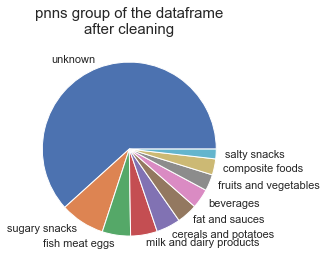

In [29]:
plt.pie(copy_dataframe_second_purification['pnns_groups_1'].value_counts(),labels = copy_dataframe_second_purification['pnns_groups_1'].value_counts().index)
text = plt.title('pnns group of the dataframe\nafter cleaning', fontsize=15)

Les variables dans deux catégories différentes comme "salty-snacks" et "Salty snacks" sont maintenant sous "salty snacks".

## Corrélation des variables

Matrice de corrélation des variables numériques

In [30]:
dataframe_for_correlation = copy_dataframe_second_purification.copy()

In [31]:
correlation_dataframe = dataframe_for_correlation.corr(method='pearson')

In [32]:
correlation_dataframe.style.background_gradient(cmap='coolwarm')

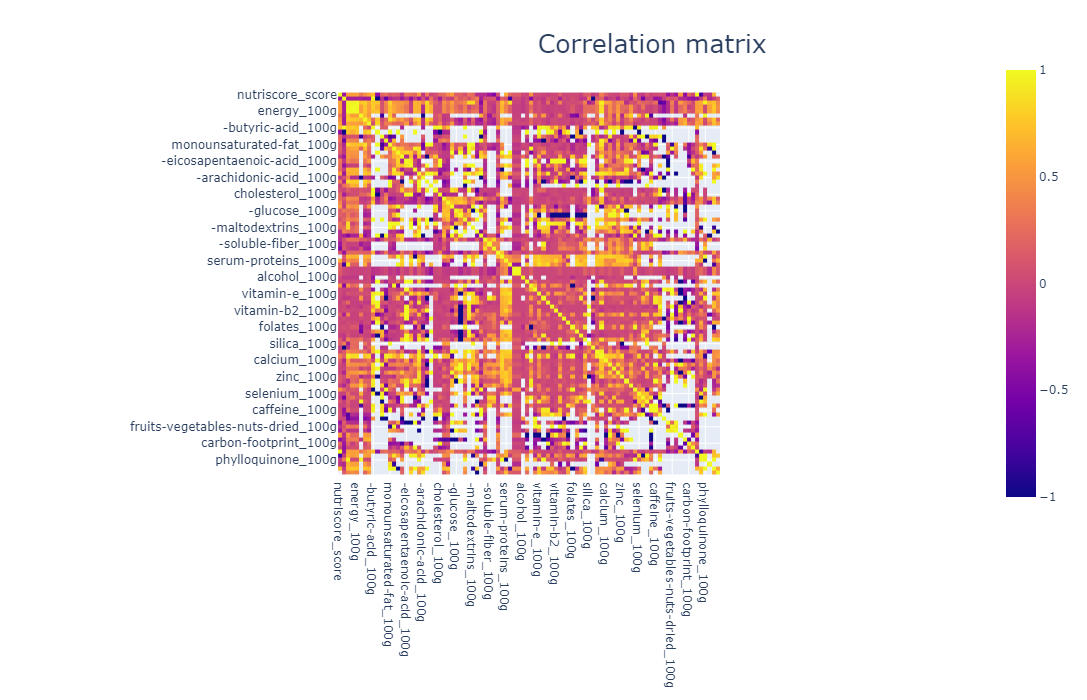

In [33]:
an.plot_heat_map(correlation_dataframe)

Il parait y avoir beaucoup de corrélation à 1. Regardons de plus près les résultats.  
Voici la liste des variables qui ont une corrélation de 1.

In [34]:
an.variables_correlation_over_parameter(correlation_dataframe,1,1)

Correlation entre 1 et 1
nutriscore_score et nutrition-score-fr_100g
ecoscore_score_fr et -butyric-acid_100g
energy-kj_100g et energy_100g
-butyric-acid_100g et trans-fat_100g
-butyric-acid_100g et cholesterol_100g
-butyric-acid_100g et -lactose_100g
-butyric-acid_100g et vitamin-k_100g
-palmitic-acid_100g et vitamin-e_100g
-palmitic-acid_100g et vitamin-c_100g
-palmitic-acid_100g et potassium_100g
-palmitic-acid_100g et iron_100g
-arachidic-acid_100g et -lactose_100g
-arachidic-acid_100g et chromium_100g
-behenic-acid_100g et polyols_100g
-behenic-acid_100g et fluoride_100g
omega-3-fat_100g et -sucrose_100g
omega-3-fat_100g et -fructose_100g
omega-3-fat_100g et -maltose_100g
-eicosapentaenoic-acid_100g et cholesterol_100g
-eicosapentaenoic-acid_100g et vitamin-b1_100g
-eicosapentaenoic-acid_100g et vitamin-b2_100g
-eicosapentaenoic-acid_100g et vitamin-pp_100g
-eicosapentaenoic-acid_100g et biotin_100g
-eicosapentaenoic-acid_100g et pantothenic-acid_100g
-docosahexaenoic-acid_100g et 

Beaucoup trop de corrélation sont à 1.

Je vais comparer les valeurs entre deux variables qui ont une corrélation de 1.  
Je vais afficher 5 couples (une valeur pour chaque variable) de valeurs quand les deux variables sont définies en même temps.  
Je vais afficher 5 couples quand l'une n'est pas définie et quand l'autre l'est.  
Je vais afficher 5 couples avec le processus inverse.

In [35]:
dataframe_for_correlation = copy_dataframe_second_purification.copy()

In [36]:
an.good_or_bad_correlation(correlation_dataframe,dataframe_for_correlation)

-------------------------------------------------------------------------------


nutriscore_score  nutrition-score-fr_100g
4               18.0                     18.0
15               1.0                      1.0
24              14.0                     14.0
34              -2.0                     -2.0
38               1.0                      1.0

nutriscore_score  nutrition-score-fr_100g
518930                NaN                     13.0
602194                NaN                     22.0
616619                NaN                     22.0
1185133               NaN                     10.0
1772211               NaN                     22.0

Empty DataFrame
Columns: [nutriscore_score, nutrition-score-fr_100g]
Index: []

-------------------------------------------------------------------------------
Fausse correlation de  1  pour  ecoscore_score_fr  and  -butyric-acid_100g
-------------------------------------------------------------------------------


energy-kj_100g  energy_100g
4             936.0        936.0
170          1513.0       1513.0
286          2179.0       2179.0
289             5.0          5.0
330           450.0        450.0

energy-kj_100g  energy_100g
0              NaN       1569.0
3              NaN       3661.0
6              NaN         88.0
7              NaN        251.0
13             NaN        264.0

Empty DataFrame
Columns: [energy-kj_100g, energy_100g]
Index: []

-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  trans-fat_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  cholesterol_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  -lactose_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -butyric-acid_100g  and  vitamin-k_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -palmitic-acid_100g  and  omega-3-fat_100g
-------------------------------------------------------------------------------
Fausse correlation de  1  pour  -palmitic-acid_100g  and  omega-6-fat_100g
-------------------------------------------------------------------------------
F

Il n'y a que les couples : (nutriscore_score,nutrition-score-fr_100g) et (energy-kj_100g,energy_100g) qui ont une corrélation réelle. Les variables nutriscore_score et energy-kj_100g ne m'apportent aucune valeur en plus que l'autre variable du couple, je peux donc effacer ces deux colonnes du dataframe.

In [37]:
dataframe_for_correlation.drop(["nutriscore_score","energy-kj_100g"],axis="columns",inplace=True)

## Analyse multivariée

### relation glucide sucre

In [39]:
dataframe_purify_sample = dataframe_for_correlation.sample(100000,random_state = 14862)

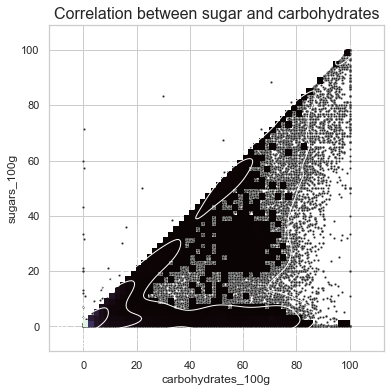

In [40]:
an.bivariate_plot_multiple_elements(dataframe_purify_sample,'carbohydrates_100g','sugars_100g','Correlation between sugar and carbohydrates')

Beaucoup d'aliments n'ont bien sûr ni sucre ni glucide, beaucoup d'autres ont un rapport de peu de sucre pour beaucoup de glucides (quand ce n'est pas le sucre qui sert de glucide). Une bonne quantité de produit ont un rapport souvent équivalent entre le sucre et les glucides (les produits composés que de sucre comme apport glucidique). Evidemment ce que l'on n'observe casiment pas c'est du sucre sans les glucides, les points affichés sont surement des erreurs dans le dataframe (je pourrais améliorer le résultat en enlevant tous les produits ou les sucres pour 100g dépassent les glucides pour 100g).

### relation glucide fibre

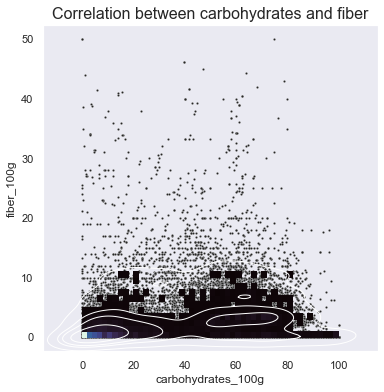

In [41]:
an.bivariate_plot_multiple_elements(dataframe_purify_sample,'carbohydrates_100g','fiber_100g','Correlation between carbohydrates and fiber')

Beaucoup d'aliments ont des glucides avec peu de fibre, le noyau dense est observé avec une quantité peu élevé de fibre et de glucide.

### relation energy_100g et  sugars_100g

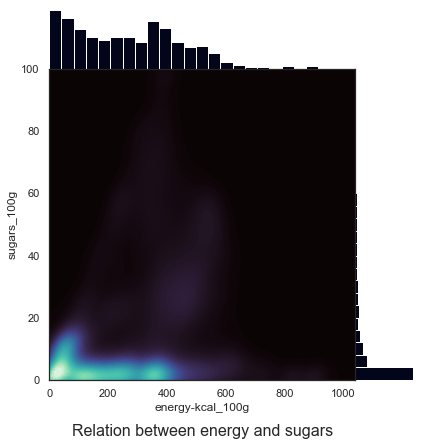

In [42]:
an.smooth_density_marginal_histograms(dataframe_purify_sample,"energy-kcal_100g","sugars_100g",dataframe_purify_sample["energy-kcal_100g"].max(),dataframe_purify_sample["sugars_100g"].max(),"Relation between energy and sugars")

La trainée claire montante ainsi que les histogrammes marginaux indiquent que les sucres ne sont pas la première source d'énergie des aliments présents dans le dataset, beaucoup d'aliments contiennent peu de sucre mais sont quand même très energétique.

### relation fat_100g et omega-3-fat_100g

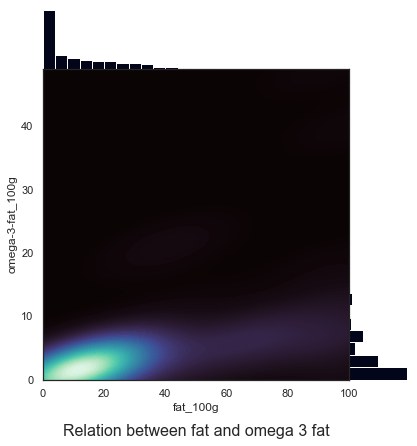

In [43]:
an.smooth_density_marginal_histograms(dataframe_purify_sample,"fat_100g","omega-3-fat_100g",dataframe_purify_sample["fat_100g"].max(),dataframe_purify_sample["omega-3-fat_100g"].max(),"Relation between fat and omega 3 fat")

Les omégas 3 sont rares et n'augmentent que peu avec l'augmentation de gras dans les aliments

In [44]:
dataframe_for_analysis = dataframe_for_correlation.copy()
dataframe_for_analysis.columns = dataframe_for_analysis.columns.str.replace('[-]','_')

<ipython-input-44-88ffb73fbf67>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



1407625 produits trouvés


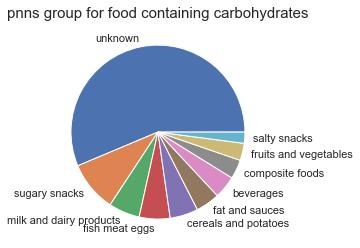

In [45]:
an.find_pnns1_part(dataframe_for_analysis,'carbohydrates_100g')

1938 produits trouvés


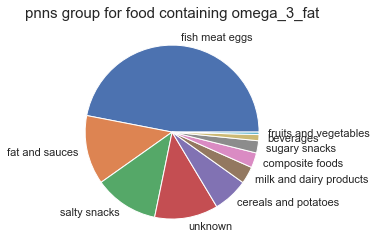

In [46]:
an.find_pnns1_part(dataframe_for_analysis,'omega_3_fat_100g')

1938 produits trouvés


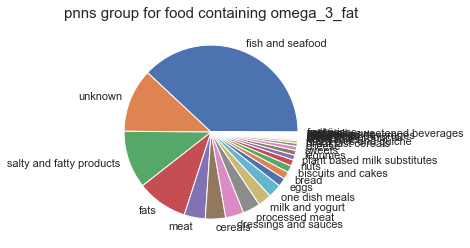

In [47]:
an.find_pnns2_part(dataframe_for_analysis,'omega_3_fat_100g')

1355170 produits trouvés


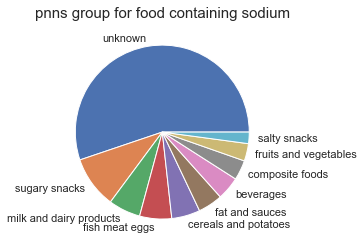

In [48]:
an.find_pnns1_part(dataframe_for_analysis,'sodium_100g')

### Voici quelques variables pertinentes pour un application orienté sport

trace_element_variables = ['sodium_100g','zinc_100g','copper_100g','potassium_100g','selenium_100g','manganese_100g','chromium_100g','iodine_100g']
acid_variables = ['omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g']
vitamin_variables = ['vitamin-b1_100g','vitamin-b2_100g','vitamin-b6_100g']
sugar_variables = ['carbohydrates_100g','glycemic-index_100g','sugars_100g','-sucrose_100g','-glucose_100g','-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g']
string_variables = ['pnns_groups_1','pnns_groups_2','nutriscore_score','nutriscore_grade','ecoscore_score_fr','ecoscore_grade_fr']